In [1]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
X_train = pd.read_pickle('training/x_train.pkl')
Y_train = pd.read_pickle('training/y_train.pkl')
X_test = pd.read_pickle('training/x_test.pkl')
Y_test = pd.read_pickle('training/y_test.pkl')

In [3]:
model1 = svm.SVC(kernel='linear', gamma='auto', C=0.001)

In [4]:
# model1.fit(X_train.values, Y_train.values)

In [5]:
# score1 = accuracy_score(model1.predict(X_test.values), Y_test.values)
# print(score1)

In [6]:
model2 = svm.SVC(kernel="poly", gamma='auto', C=0.001)

In [7]:
# model2.fit(X_train.values, Y_train.values)

In [8]:
model2 = pickle.load(open('model2.sav', 'rb'))

/Users/pratyushkerhalkar/opt/miniconda3/envs/osr/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
score2 = accuracy_score(model2.predict(X_test.values), Y_test.values)
print(score2)

0.8378756114605171


In [10]:
fpr, tpr, thresholds = roc_curve(Y_test.values, model2.predict(X_test.values))
print(thresholds)

[2 1 0]


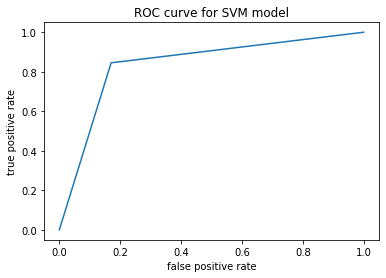

In [11]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title("ROC curve for SVM model")
plt.savefig('svm_roc_plot.png', dpi=256)

In [12]:
cm = confusion_matrix(Y_test.values, model2.predict(X_test.values))
print(cm)

[[565 116]
 [116 634]]


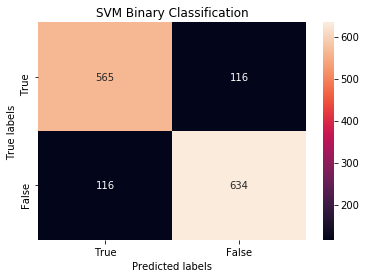

In [13]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('SVM Binary Classification')
ax.xaxis.set_ticklabels(['True', 'False']); ax.yaxis.set_ticklabels(['True', 'False'])
plt.savefig('svm_binary_confusion_matrix.png', dpi=256)

In [14]:
# model3 = svm.SVC(kernel="rbf", gamma='auto', C=0.001)

In [15]:
# model3.fit(X_train.values, Y_train.values)

In [16]:
# score3 = accuracy_score(model3.predict(X_test.values), Y_test.values)
# print(score3)